In [46]:
#  remove files from github

from glob import glob
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import os
import scipy
import pandas as pd

In [131]:
def get_pangenome_counts(input_table, bootstrap_no):

    core_rows = defaultdict(dict)
    pan_rows = defaultdict(dict)

    for i in range(bootstrap_no):
        gid_list = np.array(input_table.columns)
        np.random.shuffle(gid_list)

        core = []
        pan = []
        count = 0

        for gid in gid_list:
            if core == []:
                core = set(input_table.loc[input_table[gid] != 0].index)
            else:
                core = set(input_table.loc[input_table[gid] != 0].index) & set(core)
            if pan == []:
                pan = np.array(input_table.loc[input_table[gid] != 0].index)
            else:
                pan = np.union1d(np.array(input_table.loc[input_table[gid] != 0].index), pan)

            core_rows['try_%d'%i][count] = len(core)
            pan_rows['try_%d'%i][count] = len(pan)
            count += 1
            
    core_matrix = pd.DataFrame(core_rows)
    pan_matrix = pd.DataFrame(pan_rows)
    
    pangenome_res = pd.DataFrame({'Core genome (mean)':core_matrix.apply(np.mean, axis = 1), 'Core genome (std)':core_matrix.apply(np.std, axis = 1), 
 'Pan genome (mean)':pan_matrix.apply(np.mean, axis = 1), 'Pan genome (std)':pan_matrix.apply(np.std, axis = 1)})
    return pangenome_res


def plot_pangenome_curves(pangenome_res, ax, plot_std = False):

    xrange = pangenome_res.index

    ax.plot(xrange, pangenome_res['Core genome (mean)'], 'maroon', label = 'Core genome')

    ax.plot(xrange, pangenome_res['Pan genome (mean)'], 'midnightblue', label = 'Pan genome')

    ax.legend()

    if plot_std == True:

        ax.plot(xrange, pangenome_res['Core genome (mean)'] + pangenome_res['Core genome (std)'], 'maroon', linestyle = 'dashed', linewidth = 0.8)
        ax.plot(xrange, pangenome_res['Core genome (mean)'] - pangenome_res['Core genome (std)'], 'maroon', linestyle = 'dashed', linewidth = 0.8)

        ax.plot(xrange, pangenome_res['Pan genome (mean)'] + pangenome_res['Pan genome (std)'], 'midnightblue', linestyle = 'dashed', linewidth = 0.8)
        ax.plot(xrange, pangenome_res['Pan genome (mean)'] - pangenome_res['Pan genome (std)'], 'midnightblue', linestyle = 'dashed', linewidth = 0.8)    


    ax.set_ylabel('No. genes')
    ax.set_xlabel('No. strains')  
    
    return ax
    
from scipy.optimize import curve_fit

def heaps_func(X, k, gamma):
    return k*X[0]**gamma+ X[1]

def return_heaps_estimates(matrix):
    popt, pcov = curve_fit(heaps_func, [range(len(pangenome_res)),pangenome_res['Pan genome (mean)'].iloc[0]], pangenome_res['Pan genome (mean)'])
    stds = np.sqrt(np.diag(pcov))
    heaps_estimates = pd.DataFrame(list({'K estimate':round(popt[0],3), 'Gamma estimate': round(popt[1],3), 'K standard deviation':round(stds[0], 3), 'Gamma standard deviation': round(stds[1], 3)}.items())).set_index(0).T
    return heaps_estimates

In [132]:
from glob import glob

In [133]:
os.makedirs('/home/yara/Documents/pangenome_curves/output')

In [ ]:
bootstrap_no = 1000
heaps_estimate = pd.DataFrame()

for input_file in glob('../data/functional_subsystem/*'):
    organism = input_file.split('/')[-1].split('_pan_input_matrix')[0]
    print(organism)
    input_table = pd.read_csv(input_file, dtype = {'genome_id':str}).set_index('genome_id').T

    pangenome_res = get_pangenome_counts(input_table, bootstrap_no)
    pangenome_res.to_csv('/home/yara/Documents/pangenome_curves/output/%s'%organism)

    heaps_estimate = heaps_estimate.append(return_heaps_estimates(pan_matrix).rename(index = {1:organism}))

p_aeru


/home/yara/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


e_faecium
s_aurues
a_baum


/home/yara/.local/lib/python3.5/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in power


e_cloacae
e_coli


In [ ]:
fig, axes = plt.subplots(4, 2, figsize = (10,10))
i = 0
for input_file in glob('../data/functional_subsystem/*'):
    organism = input_file.split('/')[-1].split('_pan_input_matrix')[0]
    pangenome_res = pd.read_csv('/home/yara/Documents/pangenome_curves/output/%s'%organism)
    axes[i%4, int(i/4)] = plot_pangenome_curves(pangenome_res, axes[i%4, int(i/4)], plot_std= True)
    i += 1

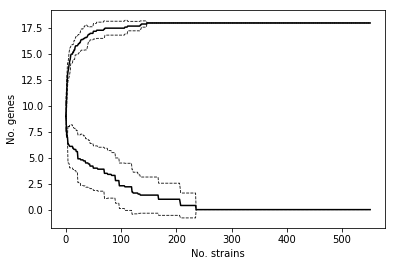

In [103]:
fig, ax2 = plt.subplots(1,1)
ax2 = plot_pangenome_curves(core_matrix, pan_matrix, ax2)
fig.savefig('temp_plot.svg')

ValueError: Only know how to handle extensions: ['png']; with Pillow installed matplotlib can handle more images

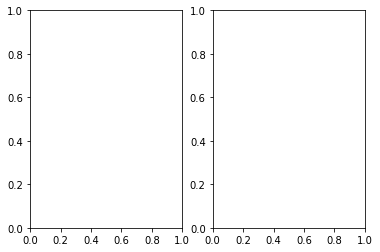

In [104]:
fig, ax = plt.subplots(1,2)
ax[0] = plt.imread('temp_plot.svg')
ax[1] = plt.imread('temp_plot.svg')

In [75]:
stds = np.sqrt(np.diag(pcov))

array([0.07677665, 0.00244214])